# Ordinary Least Squares (OLS) vs. Gradient Descent (GD): Academic Performance

## 1) Abstract: Framing the Problem

Machine learning is transforming industries with powerful applications like image recognition, spam detection, and conversational AI. These advancements often rely on *deep learning*, which requires large datasets, significant computational power, and specialized hardware. While deep learning excels in tasks like computer vision and natural language processing, it may not always align with the needs of small- and medium-sized enterprises (SMEs).

For these businesses, *shallow learning* offers a compelling alternative. By solving well-defined problems with smaller datasets and simpler models, shallow learning techniques are faster, more cost-effective, and easier to interpret. Examples include predicting sales revenue (using regression), segmenting customers (with decision trees), and classifying products (via k-nearest neighbors).

One interesting area of comparison lies in multiple regression, where gradient descent (GD) from machine learning competes with traditional ordinary least squares (OLS). This article evaluates both methods to determine their suitability for SMEs, focusing on criteria like accuracy, speed, and memory usage. It additionally looks at other areas of machine learning (e.g. ridge regression) to give readers a full understanding of alternative tools.

By analyzing these aspects, this article aims to provide a comprehensive comparison that will help readers choose the appropriate method for their specific use case.

## 2) Introduction: What Is Multiple Regression?

Multiple regression is a statistical technique used to model the relationship between one dependent variable (or label) and two or more independent variables (or features). It is a powerful tool for understanding how changes in independent variables influence the dependent variable.

This modeling approach can be implemented using various strategies, but I will focus on two aforementioned methods:

**Ordinary Least Squares (OLS)**, which derives the solution through pure mathematical analysis by minimizing the sum of squared residuals through matrix operations.\
**Gradient Descent (GD)**, an iterative machine learning optimization algorithm that minimizes the loss function (e.g., mean squared error) by updating parameters step by step using the losses's gradients.

These methods represent two distinct approaches to solving multiple regression problems: one analytical and one numerical. Comparing their performance will provide insight into their suitability based on dataset size, computational constraints, and other practical considerations.

Note: For deriving the solutions, solutions will be implemented using both the NumPy and SciPy libraries. This will be seen shortly.

### **Ordinary Least Squares (OLS)**

#### **0) How to Get Started**

We start with the following equation:

$$\boldsymbol{X}\boldsymbol{β} = \boldsymbol{y}$$

Where:

*X* := The design matrix of independent variables\
*β* := The vector of parameters (coefficients to be estimated)\
*y* := The vector of the dependent variable

This is not possible, however, since there is always an error value, known as the *residuals*. 

Thus:

$$\boldsymbol{X}\boldsymbol{\hat{\beta}} + \boldsymbol{\epsilon} = \boldsymbol{\hat{y}}$$

With that in mind, OLS can be derived through various approaches:

#### **1) Optimization using calculus**  

In this scenario, we minimize the norm of $\boldsymbol{y} - \boldsymbol{\hat{y}}$, which will give us the vector of parameters. $$\min_β |\boldsymbol{y} - \boldsymbol{\hat{y}}| = \min_β |\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\hat{β}}|^2$$

I won't do the math for this, but if you're interested, it requires calculus and is a stronger solution since it follows along the maximum likelihood estimation (MLE).

#### **2) Using the Left Inverse**

Because $Xβ$ is assumed to be full column rank, we can derive *β*.

In other words, if we multiply $Xβ$ by its transpose, we can then multiply it by its inverse.

Thus:

$$\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{β} = \boldsymbol{X}^T\boldsymbol{y}$$
$$(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{β} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$
$$\boldsymbol{I}\boldsymbol{β} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$
$$\boldsymbol{β} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

Note:
*I* = The identity matrix

Because β is predicting y, it is better to conclude that this derivation represents $\boldsymbol{\hat{β}}$.

This is not the best approach because we are assuming $Xβ$ is full column rank, which may not be true if there is **Multicollinearity**.

Why? If one parameter is a linear combination of any of the others, then the design matrix $X$ is not of full column rank (e.g. $β_3 = 4*β_1$).

#### **3) Transforming $X$ to Row Canonical Form**

The equation

$$\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{β} = \boldsymbol{X}^T\boldsymbol{y}$$

can be row reduced to its canonical form to get the vector of parameters as well.

This will make sense in the next derivation.

#### **4) Using Orthogonal Projections**

$\boldsymbol{X}\boldsymbol{β} = \boldsymbol{y}$ can be seen as having a projection and an orthogonal component.

If we view the parameters as predictions, then we have a projection:
$$\boldsymbol{X}\boldsymbol{\hat{β}} = \boldsymbol{\hat{y}}$$

This is also known as $\boldsymbol{\hat{y}}$ projected onto the column space of $\boldsymbol{X}\boldsymbol{\hat{β}}$

The orthogonal component will be the nullspace $\boldsymbol{X}\boldsymbol{\hat{β}}$, which is the residual: $\boldsymbol{y} - \boldsymbol{\hat{y}}$ (or $\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\hat{β}}$)

In other words, the *residual* (orthogonal) and *prediction* (projection) add up to the vector of the dependent variable: y

What now?

Given that $\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\hat{β}}$ is orthogonal to the column space of $\boldsymbol{X}$, then it's orthogonal to each column of $\boldsymbol{X}$:

$$\boldsymbol{X}^T*(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\hat{β}}) = 0$$
$$\boldsymbol{X}^T\boldsymbol{y} - \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\hat{β}} = 0$$
$$\boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\hat{β}}$$
$$(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{\hat{β}}$$

We could have solved for that using row reduction, where $\boldsymbol{X}^T\boldsymbol{X}$ is augmented by $\boldsymbol{X}^T\boldsymbol{y}$, then put into row canonical form.

#### **5) Using Factorizations (e.g. QR Factorization, SVD)**

This article will not explore factorizations, but any rectangular matrix can be factorized into other, smaller matrices using various methods. Once factorized, the parameters can be estimated, often as easily as the previous approaches.

#### **Conclusion**

Regardless of which approach you use with OLS, the parameters will be:
$$\boldsymbol{\hat{β}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

<!-- #### **0) How to Get Started**

With GD, you must decide a cost function, AKA a loss or an objective function.

For multiple regression, we start with the mean square error (MSE) as the cost function (it is most common):

$$MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \beta_0 - \mathbf{x}_i^T \boldsymbol{\beta})^2$$

Where:

*N* := Number of data points\
*y_i* := The vector of the dependent variable\
*β_0* := The scalar of the independent variable's intercept\
*β_i* := The vector of parameters (coefficients to be estimated)\
*x_i* := The vector of independent variables

Note: This has not been put in matrix form because GD uses calculus.

At first, you might think, "How can I calculate the residual without first having values for the parameters?"

GD iteratively determines the parameters' values.

You add the value of the partial derivative of the MSE with regard to the particular parameter:

$$\frac{\partial MSE}{\partial \beta_0} = -\frac{2}{N} \sum_{i=1}^N (y_i - \beta_0 - \mathbf{x}_i^T \boldsymbol{\beta_i})$$

$$\frac{\partial MSE}{\partial {\beta_i}} = -\frac{2}{N} \sum_{i=1}^{N}(y_i - \beta_0 + \mathbf{x}_i^T \boldsymbol{\beta_i}) * x_i$$

Now, let's set the parameters to 0 and add a learning rate (α) and number of times (i.e. epochs) to update each parameter.

$\alpha = 0.01$ will be the learning rate, and $t = 100$ will be the number of epochs.

We want to update the model parameters using the following equations:

$$\beta_0^{t+1} = \beta_0 + \alpha \cdot \frac{\partial MSE}{\partial \beta_0}$$

$$\beta_i^{t+1} = \beta_i + \alpha \cdot \frac{\partial MSE}{\partial \beta_i}$$

Substituting the derivatives we found earlier:

$$\beta_0^{t+1} = \beta_0^{t+1} + 0.01 \cdot (-\frac{2}{N} \sum_{i=1}^{N}(y_i - (\beta_0^{t+1} + \beta_i x_i)))$$

$$\beta_i^{t+1} = \beta_i + 0.01 \cdot (-\frac{2}{N} \sum_{i=1}^{N}(y_i - (\boldsymbol{\beta_0} + \beta_i \boldsymbol{x_i})) \cdot \boldsymbol{x_i})$$

Simplifying the equations:

$$\beta_0^{t+1} = \beta_0 - 0.02 \sum_{i=1}^{N}(y_i - (\boldsymbol{\beta_0} + \beta_i \boldsymbol{x_i}))$$

$$\beta_i^{t+1} = \beta_i - 0.02 \sum_{i=1}^{N}(y_i - (\boldsymbol{\beta_0} + \beta_i \boldsymbol{x_i})) \cdot \boldsymbol{x_i}$$ -->

### **Gradient Descent (GD)**

#### **0) How to Get Started**

To perform Gradient Descent (GD), you must first decide on a cost function, also known as a loss or objective function. Each parameter will iteratively update with the gradient of the cost function.

As the values of the gradient decrease, you get closer to the optimal value of the cost function -- and of the parameters. Unlike conventional optimization, which you may have come across in calculus, GD sets a learning rate by which to update initial values. In addition, you run GD a set number of times, known as epochs, and run the algorithm using a loop (for or while; your choice). You may additionally set a step size; at that point, if one partial derivative is greater than the precision, GD stops. At that point, you've identified the regressor's parameters. 

For multiple regression, we typically use the mean squared error (MSE) as the cost function:
\boldsymbol
<!-- $$MSE = \frac{1}{N} \| \mathbf{y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta} \|^2$$ -->

$$MSE = \frac{1}{N} \| \boldsymbol{y} - \boldsymbol{X}\boldsymbol{β} \|^2$$
<!-- $$MSE = \frac{1}{N} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^{T} * (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})$$ -->

Where:

*N* := Number (scalar) of data points\
*y* := Vector of dependent variables (N * 1)\
*X* := Matrix of independent variables (M * N)\
*β* := Vector of parameters (coefficients to be estimated, N * 1)
<!-- *β_0* := Scalar intercept term\ -->
<!-- *1* := Vector of 1's (n * 1)\ -->

At first, you might think, "How can I calculate the residual without first having values for the parameters?"

GD iteratively determines the parameters' values updating the parameters at each step based on the gradient of the cost function, which, in this case, is the MSE.

You add the value of the partial derivative of the MSE with regard to the particular parameter:

<!-- $$\frac{\partial MSE}{\partial \beta_0} = \frac{2}{N} \mathbf{1}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$

$$\frac{\partial MSE}{\partial \boldsymbol{\beta}} = \frac{2}{N} \mathbf{X}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$ -->

$$\frac{1}{N} (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{β})^T(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{β})$$

We get the following in its expanded form:
$$\frac{1}{N} \left(||\boldsymbol{y}||^2 - \boldsymbol{β}^T\boldsymbol{X}^T\boldsymbol{y} - \boldsymbol{X}\boldsymbol{β}\boldsymbol{y}^T + ||\boldsymbol{X}||^2\right)$$

Since we are taking the gradient:

- The squared norm of $y$ drops out
- The two middle values are symmetric ($A = A^T$)
- The derivative of the transpose is 2
- The derivative of $β$ alone is 1

Thus, the gradient is:
$$\frac{1}{N} \left(0 - 2\boldsymbol{X}^T\boldsymbol{y} + 2\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{β}\right)$$
The shared term is $2X^T$:
$$\frac{1}{N} \cdot 2\boldsymbol{X}^T \cdot (\boldsymbol{X}\boldsymbol{β} - \boldsymbol{y})$$

This is the gradient for the Mean Squared Error (MSE).

<!-- \frac{\partial MSE}{\partial \boldsymbol{\beta}} =  -->

Now, let's set the parameters to 0 and add the learning rate (α) and epochs (t) to update each parameter. Let's set α to 0.01.

The updates for the parameters are:

<!-- $$\beta_0^{(t+1)} = \beta_0^{(t)} - \alpha \cdot \frac{\partial MSE}{\partial \beta_0}$$ -->

$$\boldsymbol{β}^{t+1} = \boldsymbol{β}^{t} - \alpha \cdot \frac{\partial MSE}{\partial \boldsymbol{β}}$$

Substituting the derivatives into the update equations:

<!-- $$\beta_0^{(t+1)} = \beta_0^{(t)} - 0.01 \times \frac{2}{N} \mathbf{1}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$ -->

$$\boldsymbol{β}^{t+1} = \boldsymbol{β}^t - 0.01 \cdot \frac{1}{N} \cdot 2\boldsymbol{X}^T \cdot (\boldsymbol{X}\boldsymbol{β} - \boldsymbol{y})$$

The updated values will run against the epochs.

#### **1) GD with Other Cost Functions**

Depending on what you're trying to achieve (e.g. regression, classification, anomaly detection), you can choose a different cost function. I will not cover each here, but you can find a *partial* list of those cost functions [here](https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications).

#### **Conclusion**

<!-- The expressions $\beta_0^{(t+1)}$ and $\boldsymbol{\beta}^{(t+1)}$ would give us the intercept and vector of parameters. -->

The expression $\boldsymbol{β}^{t+1}$ will give us the intercept and vector of parameters.

## 3) Methodology: What Do We Know About the Data?

### Gathering the Data

The dataset comes from [Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression).

The dataset examines the factors influencing academic student performance, including:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

The target variable, performance index, measures each student's overall performance. The index, rounded to the nearest integer, ranges from 10 to 100, with higher values indicating better performance.

In [202]:
# The dataset will come from Kaggle:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
print("Path to dataset files:", path)

Path to dataset files: /Users/alexdubro/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


### Importing the Necessary Packages

In [215]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd 
from scipy.linalg import pinv
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
import sys
import time

In [204]:
dataset_path = os.path.join(path, 'Student_Performance.csv')

raw_data = pd.read_csv(dataset_path)
raw_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Cleaning/preprocessing the Data

The data must be cleaned/preprocessed for duplicates and null values.

In [205]:
# 1) Removing null data

raw_data.dropna(inplace=True)

# 2) Removing duplicates

raw_data.drop_duplicates(inplace=True)

Because there is a categorical variable, the data must be dummy coded. This will be done using using one-hot encoding.

In [206]:
raw_data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

In [207]:
updated_data = pd.get_dummies(raw_data, columns=['Extracurricular Activities'], dtype=int)
updated_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


Now, we need to separate the target into its target (dependent) variable, Performance Index, and the predictors (independent variables). For OLS, a column of 1's will be stacked to the left for the intercept.

In [ ]:
# Targeting data

y = updated_data['Performance Index']
X = updated_data.drop('Performance Index', axis=1)
cols = ['Intercept'] + X.columns.tolist()

X_with_intercept = np.column_stack([np.ones(len(X)), X])
X_transpose = X_with_intercept.T

### Visualizing the Data

What do know about the students?

In [209]:
updated_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651,0.505014,0.494986
std,2.589081,17.325601,1.697683,2.867202,19.208570,0.500000,0.500000
min,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,0.000000,0.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,1.000000,0.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000,1.000000,1.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000,1.000000,1.000000


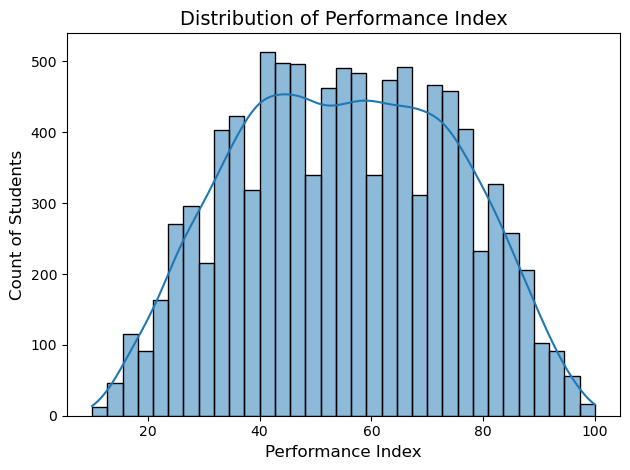

In [9]:
sns.histplot(x='Performance Index', data=updated_data, kde=True)
plt.xlabel('Performance Index', fontsize=12)
plt.ylabel('Count of Students', fontsize=12)
plt.title('Distribution of Performance Index', fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
mask = np.zeros_like(updated_data.corr())
upper_triangle = np.triu_indices_from(mask)
mask[upper_triangle] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

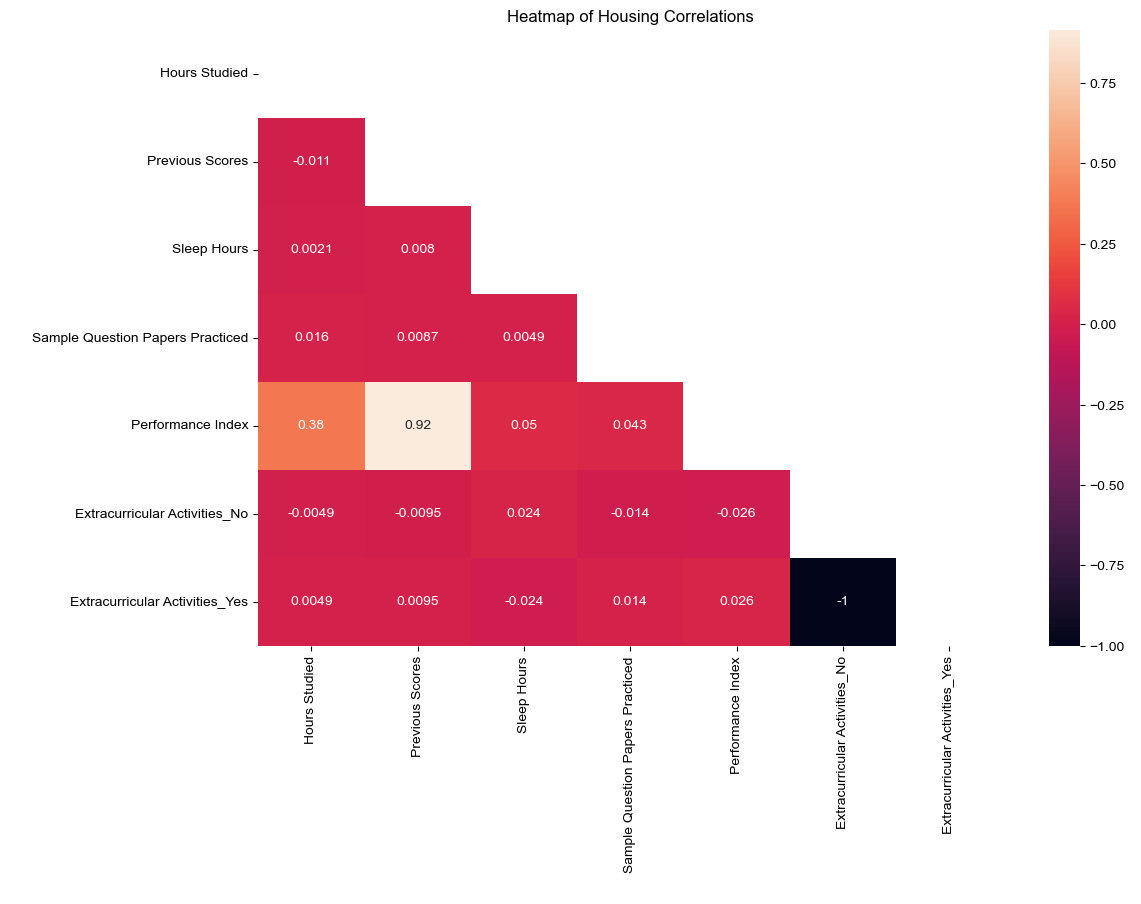

In [11]:
plt.figure(figsize=(12, 8))

sns.heatmap(updated_data.corr(), mask=mask, annot=True).set(title='Heatmap of Housing Correlations')
sns.set_style('white')
plt.show()

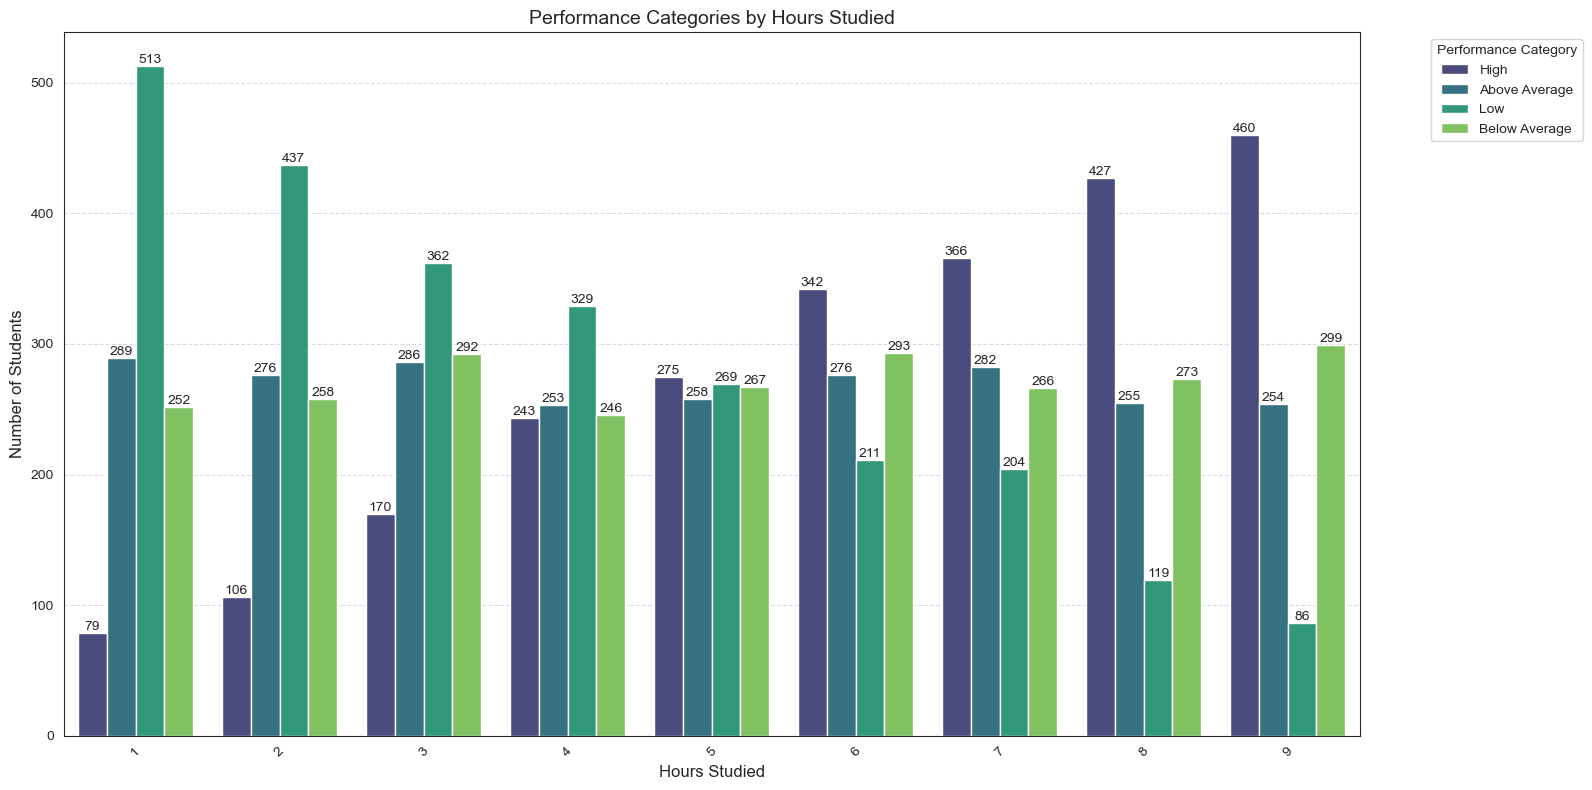

Performance Category Thresholds:
Q1 (25th percentile): 40.00
Median (50th percentile): 55.00
Q3 (75th percentile): 70.00

Performance Category Distribution:
Performance Category
Low              2530
High             2468
Below Average    2446
Above Average    2429
Name: count, dtype: int64

Percentage Distribution:
Performance Category
Low              25.625443
High             24.997468
Below Average    24.774638
Above Average    24.602451
Name: proportion, dtype: float64


In [12]:
# Calculate quartiles for more meaningful categorization
q1 = updated_data['Performance Index'].quantile(0.25)
q2 = updated_data['Performance Index'].quantile(0.5)  # Median
q3 = updated_data['Performance Index'].quantile(0.75)

# Create Performance Category column with more granular categories
def categorize_performance(performance):
    if performance <= q1:
        return 'Low'
    elif performance <= q2:
        return 'Below Average'
    elif performance <= q3:
        return 'Above Average'
    else:
        return 'High'

updated_data['Performance Category'] = updated_data['Performance Index'].apply(categorize_performance)

# Create the plot
plt.figure(figsize=(16, 8))
sns.countplot(
    data=updated_data,
    x='Hours Studied',
    hue='Performance Category',
    palette='viridis',
    order=sorted(updated_data['Hours Studied'].unique())
)

# Customize plot
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Performance Categories by Hours Studied', fontsize=14)
plt.legend(title='Performance Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add value annotations on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print detailed information
print("Performance Category Thresholds:")
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Median (50th percentile): {q2:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print("\nPerformance Category Distribution:")
print(updated_data['Performance Category'].value_counts())
print("\nPercentage Distribution:")
print(updated_data['Performance Category'].value_counts(normalize=True) * 100)

## 4) Findings/Results: Analysis Using OLS & GD 

Let's track the coefficients of each algorithm so that we can compare them.

In [389]:
comparison = pd.DataFrame()

### Ordinary Least Squares (OLS)

We will be using the following equation to derive the parameters for OLS:

$$\boldsymbol{\hat{β}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

NumPy gives us fairly different results than SciPy's.

##### NumPy's Parameters

In [362]:
# Start timing
start_time = time.time()

beta_encoding_numpy = np.linalg.inv(X_transpose @ X_with_intercept) @ X_transpose @ y

beta_series_numpy = pd.Series(data=beta_encoding_numpy, index=cols)

elapsed_time = time.time() - start_time

beta_memory_numpy = sys.getsizeof(beta_encoding_numpy)
series_memory_numpy = sys.getsizeof(beta_series_numpy)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for beta_encoding_numpy: {beta_memory_numpy} bytes")
print(f"Memory usage for Pandas Series: {series_memory_numpy} bytes")

# Optionally, display the coefficients
print(beta_series_numpy)

Computed beta coefficients in 0.009611 seconds
Memory usage for beta_encoding_numpy: 168 bytes
Memory usage for Pandas Series: 610 bytes
Intercept                          -138.946289
Hours Studied                         2.855284
Previous Scores                       1.018782
Sleep Hours                           0.541864
Sample Question Papers Practiced      0.243364
Extracurricular Activities_No        68.990479
Extracurricular Activities_Yes       66.042480
dtype: float64


In [363]:
# Add NumPy's coefficients

comparison['NumPy OLS'] = beta_series_numpy

SciPy's is much closer to statsmodels, though its elapsed time is much higher; the memory usage is the same.

While the elapsed time might not seem like much here, a difference nearly twice as large can make a difference with a dataset with millions of data points.

##### SciPy's Parameters

In [364]:
# beta_encoding_scipy = pinv(X_transpose @ X_with_intercept) @ X_transpose @ y

# pd.Series(data=beta_encoding_scipy, index=cols)

# Start timing
start_time = time.time()

beta_encoding_scipy = pinv(X_transpose @ X_with_intercept) @ X_transpose @ y

beta_series_scipy = pd.Series(data=beta_encoding_scipy, index=cols)

elapsed_time = time.time() - start_time

beta_memory_scipy = sys.getsizeof(beta_encoding_scipy)
series_memory_scipy = sys.getsizeof(beta_series_scipy)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for beta_encoding_scipy: {beta_memory_scipy} bytes")
print(f"Memory usage for Pandas Series: {series_memory_scipy} bytes")

# Optionally, display the coefficients
print(beta_series_scipy)

Computed beta coefficients in 0.003154 seconds
Memory usage for beta_encoding_scipy: 168 bytes
Memory usage for Pandas Series: 610 bytes
Intercept                          -22.507045
Hours Studied                        2.852729
Previous Scores                      1.018319
Sleep Hours                          0.480321
Sample Question Papers Practiced     0.193910
Extracurricular Activities_No      -11.561869
Extracurricular Activities_Yes     -10.945176
dtype: float64


In [365]:
# Add SciPy's coefficients

comparison['SciPy OLS'] = beta_series_scipy

What about the $R^2$ and $F$-Test?

In [366]:
# R-squared

# Start timing
start_time = time.time()

arr_result = X_with_intercept @ beta_encoding_scipy
y_i = np.array(y)
squared_res = ((y_i - arr_result)**2)
ss_res = sum(squared_res)

y_mean = updated_data['Performance Index'].mean()
y_mean_repeated = np.repeat(y_mean, y_i.shape[0])
squared_tot = ((y_i - y_mean_repeated)**2)
ss_tot = sum(squared_tot)

r_squared = 1 - (ss_res/ss_tot)

elapsed_time = time.time() - start_time

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for: {sys.getsizeof(f_test)} bytes")

print("R^2 statistic:", r_squared)

Computed beta coefficients in 0.006227 seconds
Memory usage for: 32 bytes
R^2 statistic: 0.9886813814840943


The $F$-Test can be calculated in two ways. Any tiny differences have to do with "numerical stability," namely that there may be rounding errors in the intermediate steps.

In [367]:
# F-test

# Start timing
start_time = time.time()

n = len(y)  # Number of observations
k = len(X.columns) # Number of predictors (excluding intercept)

# Assuming r_squared and ss_res (sum of squared residuals) are already calculated
numerator = r_squared / k
denominator = (1 - r_squared) / (n - k - 1)

f_test = numerator / denominator

elapsed_time = time.time() - start_time

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for: {sys.getsizeof(f_test)} bytes")

print("F-test statistic:", f_test)

Computed beta coefficients in 0.000443 seconds
Memory usage for: 32 bytes
F-test statistic: 143632.5245290118


In [368]:
# Calculate SS_reg (explained variance)

# Start timing
start_time = time.time()

y_mean = y.mean()
y_pred = np.dot(X_with_intercept, beta_encoding_scipy)
ss_reg = sum((y_pred - y_mean) ** 2)

# Calculate SS_res (unexplained variance)
ss_res = sum((y - y_pred) ** 2)

# Number of predictors (k) and observations (n)
n = len(y)
k = X_with_intercept.shape[1] - 1  # Exclude intercept

# F-statistic calculation
numerator = ss_reg / k
denominator = ss_res / (n - k - 1)
f_test = numerator / denominator

print("F-test statistic:", f_test)

elapsed_time = time.time() - start_time

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for: {sys.getsizeof(f_test)} bytes")


F-test statistic: 143632.5245290524
Computed beta coefficients in 0.012580 seconds
Memory usage for: 32 bytes


How do the results of NumPy and ScIpy compare to those of Statsmodels?

#### Statsmodels Parameters

In [369]:
# Start timing
start_time = time.time()

X_constant = sm.add_constant(X)

model = sm.OLS(y, X_constant).fit()

elapsed_time = time.time() - start_time

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for: {sys.getsizeof(model)} bytes")

print(model.summary())

Computed beta coefficients in 0.017651 seconds
Memory usage for: 48 bytes
                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:33:24   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [370]:
comparison['statsmodels'] = model.params.values

In [371]:
comparison

,NumPy OLS,SciPy OLS,statsmodels
Intercept,-138.946289,-22.507045,-22.507045
Hours Studied,2.855284,2.852729,2.852729
Previous Scores,1.018782,1.018319,1.018319
Sleep Hours,0.541864,0.480321,0.480321
Sample Question Papers Practiced,0.243364,0.193910,0.193910
Extracurricular Activities_No,68.990479,-11.561869,-11.561869
Extracurricular Activities_Yes,66.042480,-10.945176,-10.945176


SciPy's coefficients are fairly close! The $R^2$ is as well. While the F-tests are both very high, their differences are pronounced. This may be due to numerical stability, differences in computational approaches and degrees of freedom, how the intercept is handled by each, and exclusion of multicollinear terms by statsmodels.

The memory usage for SciPy and NumPy are much higher, by a rate of 19. Statsmodels is 2.5 times as fast as SciPy's as well. 

While the speed isn't much of a difference, the memory usage can become an issue if a dataset had 1 million rows. 

Overall, we have a robust model, though it's much more robust when using SciPy. 

How does OLS compare to GD?

## Gradient Descent (GD)

### Conventional GD

It should be *emphasized* that the results of GD will likely be different because it relies on a training set, namely a smaller dataset of the data. In other words, it finds the parameters as the dataset grows, whereas OLS is much more static since it provides the parameters as given; not as they change. That can seriously affect the accuracy of the results.

Nonetheless, let's take a look.

In [411]:
features = X
target = y

# Split the data into features and its target
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10) 

We will be using an equation similar to this one to derive the parameters for GD:

<!-- $$\beta_0^{(t+1)} = \beta_0^{(t)} - 0.01 \times \frac{2}{N} {1}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$ -->

<!-- $$\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - 0.01 \times \frac{2}{N} \mathbf{X}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$ -->

$$\boldsymbol{β}^{t+1} = \boldsymbol{β}^t - 0.01 \cdot \frac{1}{N} \cdot 2\boldsymbol{X}^T \cdot (\boldsymbol{X}\boldsymbol{β} - \boldsymbol{y})$$

In [373]:
# Start timing
start_time = time.time()

def gradient_descent(features, label, learning_rate, epochs, precision):
    guesses = []
    losses = []  # To store the loss at each epoch

    # Add a column of ones for the intercept
    X_augmented = np.hstack((np.ones((features.shape[0], 1)), features))
    beta = np.zeros(X_augmented.shape[1])  # Initialize coefficients (including intercept)

    for epoch in range(epochs):
        # Compute predictions
        predictions = X_augmented @ beta

        # Compute residuals
        residuals = predictions - label

        # Compute gradient
        gradient = (2 / len(label)) * X_augmented.T @ residuals

        # Update beta coefficients
        beta = beta - learning_rate * gradient

        # Track guesses and loss
        guesses.append(beta.copy())
        loss = np.mean(residuals ** 2)
        losses.append(loss)

        # Convergence check
        step_size = np.max(np.abs(gradient))
        if step_size < precision:
            break

    return beta, guesses, losses

beta_non_scaling, guesses, losses = gradient_descent(X_train, y_train, learning_rate=0.0001, epochs=1000, precision=0.00001)

beta_non_scaling_series = pd.Series(data=beta_non_scaling, index=cols)

elapsed_time = time.time() - start_time

series_memory_non_scaling_GD = sys.getsizeof(beta_non_scaling_series)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for Pandas Series: {series_memory_non_scaling_GD} bytes")

print(beta_non_scaling_series)
print("Loss:", losses[-1])

Computed beta coefficients in 0.742730 seconds
Memory usage for Pandas Series: 610 bytes
Intercept                          -0.190991
Hours Studied                       1.559417
Previous Scores                     0.787456
Sleep Hours                        -0.740688
Sample Question Papers Practiced   -0.257802
Extracurricular Activities_No      -0.125462
Extracurricular Activities_Yes     -0.065530
dtype: float64
Loss: 38.611837282320735


In [374]:
comparison['Conventional GD'] = beta_non_scaling_series

In [ ]:
# Start timing
start_time = time.time()

elapsed_time = time.time() - start_time

series_memory_non_scaling_GD = sys.getsizeof(beta_non_scaling_series)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for Pandas Series: {series_memory_non_scaling_GD} bytes")

print(beta_non_scaling_series)
print("Loss:", losses[-1])

The coefficients are *very* different. However, GD stops at a certain step size, as seen in the code. That may change if the data is scaled: transforming the data to handle outliers or more.

The memory usage is the same since NumPy and SciPy are using a Pandas series. However, NumPy and SciPy were transformed to a Pandas series; their memory usage is actually one-sixth of that, so that should be taken into account. 

However, GD's speed is much slower: 598 times slower relative to NumPy; 46 times slower relative to SciPy. That makes a huge difference. What remains to be seen is if that will change when GD is regularized.

There are several types of scaling, but we will focus on and apply two: min-max scaling (normalization) and standardization:
- Normalization scales the data to a specific range, which will be 0 (min) and 1 (max), hence the term min-max scaling.
- Standardization scales the data to have a mean of 0 and a standard deviation of 1, hence the term Z-score scaling.

#### Loss Curve

With the cost function we are using, the loss begins to settle at a very low number--but never 0--after a certain number of epochs.

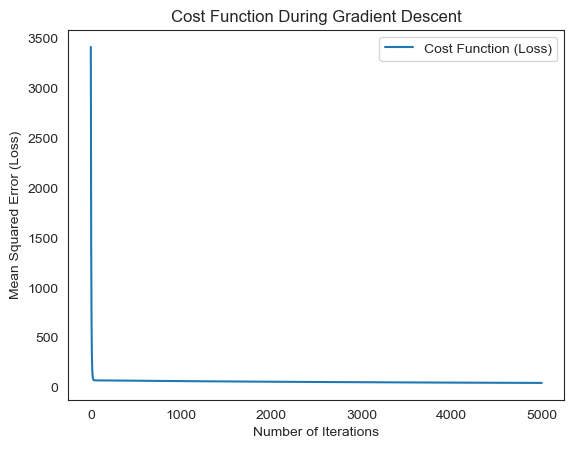

In [375]:
n = 5000

beta, guesses, losses = gradient_descent(
    X_train, y_train, learning_rate=0.00001, epochs=n, precision=0.0001
)

# Plotting the Loss Function
number_iterations = list(range(len(losses)))
plt.plot(number_iterations, losses, label="Cost Function (Loss)")
plt.xlabel("Number of Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Cost Function During Gradient Descent")
plt.legend()
plt.show()

### Min-Max Scaling

We will scale the training the data to 0 and 1 and see how that affects the coefficients.

In [376]:
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(X_train)

# Fit the scaler on the training data
X_train_min_max_scaled = min_max_scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_min_max_scaled = min_max_scaler.transform(X_test)

In [377]:
# Start timing
start_time = time.time()

def gradient_descent(features, label, learning_rate, epochs, precision):
    guesses = []
    losses = []  # To store the loss at each epoch

    # Add a column of ones for the intercept
    X_augmented = np.hstack((np.ones((features.shape[0], 1)), features))
    beta = np.zeros(X_augmented.shape[1])  # Initialize coefficients (including intercept)

    for epoch in range(epochs):
        # Compute predictions
        predictions = X_augmented @ beta

        # Compute residuals
        residuals = predictions - label

        # Compute gradient
        gradient = (2 / len(label)) * X_augmented.T @ residuals

        # Update beta coefficients
        beta = beta - learning_rate * gradient

        # Track guesses and loss
        guesses.append(beta.copy())
        loss = np.mean(residuals ** 2)
        losses.append(loss)

        # Convergence check
        step_size = np.max(np.abs(gradient))
        if step_size < precision:
            break

    return beta, guesses, losses

beta_min_max_scaling, guesses, losses = gradient_descent(X_train_min_max_scaled, y_train, learning_rate=0.01, epochs=500, precision=0.00001)

beta_min_max_scaling_series = pd.Series(data=beta_min_max_scaling, index=cols)

elapsed_time = time.time() - start_time

series_memory_min_max_scaling_GD = sys.getsizeof(beta_min_max_scaling_series)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for Pandas Series: {series_memory_min_max_scaling_GD} bytes")

print(beta_non_scaling_series)
print("Loss:", losses[-1])

Computed beta coefficients in 0.821453 seconds
Memory usage for Pandas Series: 610 bytes
Intercept                          -0.190991
Hours Studied                       1.559417
Previous Scores                     0.787456
Sleep Hours                        -0.740688
Sample Question Papers Practiced   -0.257802
Extracurricular Activities_No      -0.125462
Extracurricular Activities_Yes     -0.065530
dtype: float64
Loss: 51.72007196737789


In [378]:
comparison['Normalization Scaling GD'] = beta_min_max_scaling_series

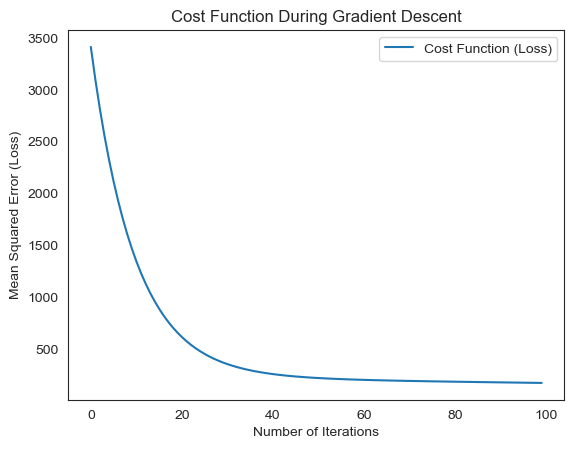

In [379]:
n = 100

beta_min_max_scaling, guesses, losses = gradient_descent(
    X_train_min_max_scaled, y_train, learning_rate=0.01, epochs=n, precision=0.00001
)

# Plotting the Loss Function
number_iterations = list(range(len(losses)))
plt.plot(number_iterations, losses, label="Cost Function (Loss)")
plt.xlabel("Number of Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Cost Function During Gradient Descent")
plt.legend()
plt.show()

In [380]:
scaler = StandardScaler()

scaler.fit(X_train)

# Fit the scaler on the training data
X_train_scaled_model = scaler.transform(X_train)

# Transform the test data using the same scaler
X_test_scaled_model = scaler.transform(X_test)

In [381]:
# Start timing
start_time = time.time()

def gradient_descent(features, label, learning_rate, epochs, precision):
    guesses = []
    losses = []  # To store the loss at each epoch

    # Add a column of ones for the intercept
    X_augmented = np.hstack((np.ones((features.shape[0], 1)), features))
    beta = np.zeros(X_augmented.shape[1])  # Initialize coefficients (including intercept)

    for epoch in range(epochs):
        # Compute predictions
        predictions = X_augmented @ beta

        # Compute residuals
        residuals = predictions - label

        # Compute gradient
        gradient = (2 / len(label)) * X_augmented.T @ residuals

        # Update beta coefficients
        beta = beta - learning_rate * gradient

        # Track guesses and loss
        guesses.append(beta.copy())
        loss = np.mean(residuals ** 2)
        losses.append(loss)

        # Convergence check
        step_size = np.max(np.abs(gradient))
        if step_size < precision:
            break

    return beta, guesses, losses

beta_scaled_scaling, guesses, losses = gradient_descent(X_train_scaled_model, y_train, learning_rate=0.001, epochs=10000, precision=0.00001)

beta_scaled_scaling_series = pd.Series(data=beta_scaled_scaling, index=cols)

elapsed_time = time.time() - start_time

series_memory_scaled_scaling_GD = sys.getsizeof(beta_scaled_scaling_series)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage for Pandas Series: {series_memory_scaled_scaling_GD} bytes")

print(beta_scaled_scaling_series)
print("Loss:", losses[-1])

Computed beta coefficients in 11.989396 seconds
Memory usage for Pandas Series: 610 bytes
Intercept                           55.145222
Hours Studied                        7.393311
Previous Scores                     17.723736
Sleep Hours                          0.819051
Sample Question Papers Practiced     0.531404
Extracurricular Activities_No       -0.149437
Extracurricular Activities_Yes       0.149437
dtype: float64
Loss: 4.125434543805155


In [382]:
comparison['Standardization Scaling GD'] = beta_scaled_scaling_series

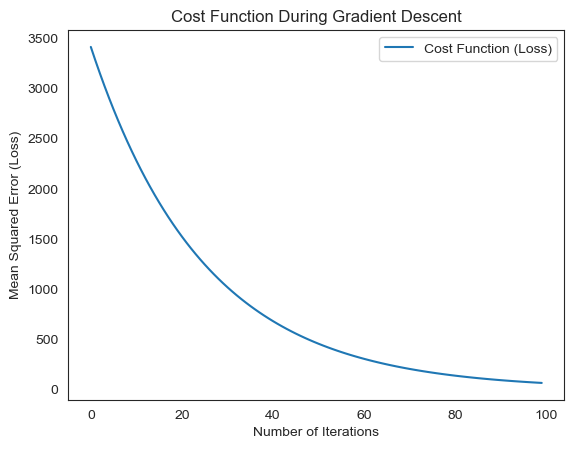

In [233]:
n = 100

beta_min_max_scaling, guesses, losses = gradient_descent(
    X_train_scaled_model, y_train, learning_rate=0.01, epochs=n, precision=0.00001
)

# Plotting the Loss Function
number_iterations = list(range(len(losses)))
plt.plot(number_iterations, losses, label="Cost Function (Loss)")
plt.xlabel("Number of Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Cost Function During Gradient Descent")
plt.legend()
plt.show()

None of our training data sets gives parameters that reflect what statsmodels and SciPy provided. How does this compare to the results of Scikit-Learn's linear regression, ridge regression, and lasso regression?

## Scikit-Learn

### Linear Regression

In [442]:
# Training data

# Start timing
start_time = time.time()

reg_lr = linear_model.LinearRegression(fit_intercept=True)
reg_lr.fit(X_train, y_train)
y_train_predict = reg_lr.predict(X_train)
sklearn_OLS_parameters = np.insert(reg_lr.coef_, 0, reg_lr.intercept_)
beta_sklearn_OLS_parameters = pd.Series(data=sklearn_OLS_parameters, index=cols)

print('R-squared: ', reg_lr.score(X_train, y_train))
print(beta_sklearn_OLS_parameters)

elapsed_time = time.time() - start_time

series_memory_sklearn_OLS = sys.getsizeof(beta_sklearn_OLS_parameters)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage: {series_memory_sklearn_OLS} bytes")

R-squared:  0.9886220450634098
Intercept                          -33.751288
Hours Studied                        2.851428
Previous Scores                      1.018221
Sleep Hours                          0.482110
Sample Question Papers Practiced     0.192570
Extracurricular Activities_No       -0.331824
Extracurricular Activities_Yes       0.331824
dtype: float64
Computed beta coefficients in 0.035186 seconds
Memory usage: 610 bytes


In [ ]:
comparison['Scikit-Learn_OLS'] = beta_sklearn_parameters

### Ridge Regression

I won't get into the math behind the ridge regression, but it uses the ℓ2 (euclidean) norm of each parameter as a penalty to prevent overfitting.

In [445]:
# Training data

# Start timing
start_time = time.time()

reg_ridge = linear_model.Ridge(alpha=1000000.0, fit_intercept=True, solver='auto')
reg_ridge.fit(X_train, y_train)
y_train_predict = reg_ridge.predict(X_train)
sklearn_ridge_parameters = np.insert(reg_ridge.coef_, 0, reg_ridge.intercept_)
beta_sklearn_ridge_parameters = pd.Series(data=sklearn_ridge_parameters, index=cols)

print('R-squared: ', reg_ridge.score(X_train, y_train))
print(beta_sklearn_ridge_parameters)

elapsed_time = time.time() - start_time

series_memory_sklearn_ridge = sys.getsizeof(beta_sklearn_ridge_parameters)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage: {series_memory_sklearn_ridge} bytes")

R-squared:  0.7786070653278572
Intercept                           4.773070
Hours Studied                       0.142973
Previous Scores                     0.714465
Sleep Hours                         0.011915
Sample Question Papers Practiced    0.014172
Extracurricular Activities_No      -0.001414
Extracurricular Activities_Yes      0.001414
dtype: float64
Computed beta coefficients in 0.035025 seconds
Memory usage: 610 bytes


In [446]:
comparison['Scikit-Learn Ridge Regression'] = beta_sklearn_ridge_parameters

In [ ]:
# Training data

# Start timing
start_time = time.time()

reg_ridge = linear_model.Ridge(alpha=1000000.0, fit_intercept=True, solver='auto')
reg_ridge.fit(X_train, y_train)
y_train_predict = reg_ridge.predict(X_train)
reg_ridge_parameters = np.insert(reg_lr.coef_, 0, reg_lr.intercept_)

print('R-squared: ', reg_ridge.score(X_train, y_train))
print(pd.DataFrame(reg_ridge.coef_,))
print('Intercept: ', reg_ridge.intercept_)

reg_lr = linear_model.LinearRegression(fit_intercept=True)
reg_lr.fit(X_train, y_train)
y_train_predict = reg_lr.predict(X_train)
sklearn_parameters = np.insert(reg_lr.coef_, 0, reg_lr.intercept_)
beta_sklearn_parameters = pd.Series(data=sklearn_parameters, index=cols)

print('R-squared: ', reg_lr.score(X_train, y_train))
print(beta_sklearn_parameters)

elapsed_time = time.time() - start_time

series_memory_sklearn = sys.getsizeof(beta_sklearn_parameters)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage: {series_memory_sklearn} bytes")

### Lasso Regression

I won't get into the math behind the lasso regression either, but it uses the ℓ1 (manhattan) norm of each parameter as a penalty to prevent overfitting.

In [451]:
# Training data

# Start timing
start_time = time.time()

reg_lasso = linear_model.Lasso(alpha=100.0, fit_intercept=True)
reg_lasso.fit(X_train, y_train)
y_train_predict = reg_lasso.predict(X_train)
sklearn_lasso_parameters = np.insert(reg_lasso.coef_, 0, reg_lasso.intercept_)
beta_sklearn_ridge_parameters = pd.Series(data=sklearn_lasso_parameters, index=cols)

print('R-squared: ', reg_lasso.score(X_train, y_train))
print(beta_sklearn_ridge_parameters)

elapsed_time = time.time() - start_time

series_memory_sklearn_lasso = sys.getsizeof(beta_sklearn_ridge_parameters)

# Display results
print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
print(f"Memory usage: {series_memory_sklearn_lasso} bytes")

R-squared:  0.7475385254285654
Intercept                           7.849117
Hours Studied                       0.000000
Previous Scores                     0.682516
Sleep Hours                         0.000000
Sample Question Papers Practiced    0.000000
Extracurricular Activities_No      -0.000000
Extracurricular Activities_Yes      0.000000
dtype: float64
Computed beta coefficients in 0.035001 seconds
Memory usage: 610 bytes


All of Scikit-Learn's regression results are still iffy, but it should not come as a surprise that the ridge and lasso regressions aren't that different. They're meant to prevent overfitting of what the original linear regression prevents, so the parameters will only decrease.

What will cross validation do?

## Cross Validation

It's necessary to define what cross validation is first since it can be confusing at first.

Cross validation splits the data set up into different training and test sets, then compares the results after any machine learning (gradient descent, in this case) is applied. For instance, I have split the data set up 80/20: 80% for training; 20% for test. 

If I were to use a k-fold cross validation approach, then I would simply be shuffling that 80/20 into 6 unique samples.

![5-fold Cross Validation](K-fold-cross-validation-1.webp)

Source: https://sqlrelease.com/introduction-to-k-fold-cross-validation-in-python

In [412]:
# Set up KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform the split
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")
    print("Train indices:", train_index)
    print("Validation indices:", val_index)

    # Use .iloc to select rows based on the positional indices
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    print("X_train:")
    print(X_train)
    print("X_val:")
    print(X_val)
    print()

Fold 1
Train indices: [   1    2    4 ... 9868 9870 9872]
Validation indices: [   0    3   10 ... 9866 9869 9871]
X_train:
      Hours Studied  Previous Scores  Sleep Hours  \
1                 4               82            4   
2                 8               51            7   
4                 7               75            8   
5                 3               78            9   
6                 7               73            5   
...             ...              ...          ...   
9992              9               52            9   
9994              6               46            8   
9995              1               49            4   
9997              6               83            8   
9999              7               74            8   

      Sample Question Papers Practiced  Extracurricular Activities_No  \
1                                    2                              1   
2                                    2                              0   
4                    

In [414]:
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare placeholders for the folds
folds = []
for train_index, val_index in kf.split(X):
    # Create train and validation sets for each fold
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    folds.append((X_train_fold, X_val_fold, y_train_fold, y_val_fold))

In [415]:
scaled_folds = []

for X_train_fold, X_val_fold, y_train_fold, y_val_fold in folds:
    scaler = StandardScaler()

    # Fit on training data and transform both train and validation sets
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)

    scaled_folds.append((X_train_scaled, X_val_scaled, y_train_fold, y_val_fold))

In [416]:
for i, (X_train_fold, X_val_fold, y_train_fold, y_val_fold) in enumerate(folds):
    print(f"Fold {i + 1}")
    start_time = time.time()

    # Run gradient descent
    beta, guesses, losses = gradient_descent(
        X_train_scaled,
        y_train_fold.values,
        learning_rate=0.001,
        epochs=5000,
        precision=0.00001
    )

    elapsed_time = time.time() - start_time
    loss = losses[-1]

    # Convert beta to Pandas Series
    # beta_series = pd.Series(data=beta, index=["Intercept"] + list(X_train_fold.columns))

    # Measure memory usage
    series_memory = sys.getsizeof(beta_series)

    # Display results
    print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
    print(f"Memory usage for Pandas Series: {series_memory} bytes")
    print(beta)
    print(f"Loss on Fold {i + 1}: {loss}\n")

Fold 1


ValueError: operands could not be broadcast together with shapes (7899,) (7898,) 

In [417]:
for i in enumerate(beta_series, start=1):
    comparison[f'Fold {i}'] = beta

In [418]:
comparison

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,"Fold (1, 0)","Fold (1, nan)","Fold (2, nan)","Fold (3, nan)","Fold (4, nan)","Fold (5, nan)","Fold (6, nan)","Fold (7, nan)"
Intercept,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hours Studied,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previous Scores,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Hours,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sample Question Papers Practiced,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extracurricular Activities_No,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extracurricular Activities_Yes,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for 
    comparison[f'Fold {i+1}'] = beta_series


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Intercept,55.093497,55.169083,55.318228,55.265778,55.224255
Hours Studied,7.372915,7.387391,7.384528,7.394784,7.385407
Previous Scores,17.619106,17.634839,17.621251,17.686568,17.643186
Sleep Hours,0.802159,0.806702,0.821887,0.827799,0.819147
Sample Question Papers Practiced,0.540061,0.571376,0.546332,0.570663,0.551992
Extracurricular Activities_No,-0.143461,-0.155475,-0.150410,-0.155615,-0.165919
Extracurricular Activities_Yes,0.143461,0.155475,0.150410,0.155615,0.165919


In [385]:
for i, beta in enumerate(beta_series, start=1):
    comparison[f'Fold {i}'] = beta

In [386]:
comparison

,NumPy OLS,SciPy OLS,statsmodels,Conventional GD,Normalization Scaling GD,Standardization Scaling GD,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7
Intercept,-138.946289,-22.507045,-22.507045,-0.190991,16.325650,55.145222,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919
Hours Studied,2.855284,2.852729,2.852729,1.559417,16.900687,7.393311,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919
Previous Scores,1.018782,1.018319,1.018319,0.787456,37.750110,17.723736,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919
Sleep Hours,0.541864,0.480321,0.480321,-0.740688,3.803435,0.819051,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919
Sample Question Papers Practiced,0.243364,0.193910,0.193910,-0.257802,3.849395,0.531404,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919
Extracurricular Activities_No,68.990479,-11.561869,-11.561869,-0.125462,7.835573,-0.149437,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919
Extracurricular Activities_Yes,66.042480,-10.945176,-10.945176,-0.065530,8.490076,0.149437,55.224255,7.385407,17.643186,0.819147,0.551992,-0.165919,0.165919


## 6) Conclusion: What Are Some Key Highlights?